# Optimization

In [1]:
from matplotlib import pyplot as plt

In [2]:
import nnfs
from nnfs.datasets import vertical_data

In [3]:
import os
import sys

module = os.path.abspath(os.path.join(".."))
if module not in sys.path:
    sys.path.append(module)

In [4]:
from Chpt_5.CrossEntropy_Loss import *

In [5]:
X, y = vertical_data(samples=100, classes=3)

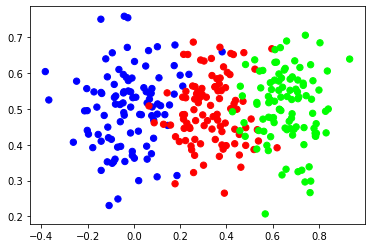

In [6]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap="brg")
plt.show()

In [7]:
dense1 = Layer_Dense(2, 3)
activation1 = Activation_ReLU()
dense2 = Layer_Dense(3, 3)
activation2 = Activation_Softmax()

In [8]:
loss_function = CategoricalCrossentropy_Loss()

In [9]:
lowest_loss = 999999
best_dense1_weights = dense1.weights.copy()
best_dense1_biases = dense1.biases.copy()
best_dense2_weights = dense2.weights.copy()
best_dense2_biases = dense2.biases.copy()

In [10]:
for iteration in range(10000):

    dense1.weights += 0.05 * np.random.randn(2, 3)
    dense1.biases += 0.05 * np.random.randn(1, 3)
    dense2.weights += 0.05 * np.random.randn(3, 3)
    dense2.biases += 0.05 * np.random.randn(1, 3)

    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    activation2.forward(dense2.output)

    loss = loss_function.calculate(activation2.output, y)

    predictions = np.argmax(activation2.output, axis=1)
    accuracy = np.mean(predictions == y)

    if loss < lowest_loss:
        print(
            "New set of weights found, iteration:",
            iteration,
            "loss:",
            loss,
            "acc:",
            accuracy,
        )
        best_dense1_weights = dense1.weights.copy()
        best_dense1_biases = dense1.biases.copy()
        best_dense2_weights = dense2.weights.copy()
        best_dense2_biases = dense2.biases.copy()
        lowest_loss = loss
    else:
        dense1.weights = best_dense1_weights.copy()
        dense1.biases = best_dense1_biases.copy()
        dense2.weights = best_dense2_weights.copy()
        dense2.biases = best_dense2_biases.copy()

New set of weights found, iteration: 0 loss: 1.099739432001059 acc: 0.3333333333333333
New set of weights found, iteration: 5 loss: 1.0988598648056822 acc: 0.3333333333333333
New set of weights found, iteration: 10 loss: 1.098658263314275 acc: 0.3333333333333333
New set of weights found, iteration: 30 loss: 1.0986333877011858 acc: 0.3333333333333333
New set of weights found, iteration: 54 loss: 1.097939377730792 acc: 0.5833333333333334
New set of weights found, iteration: 55 loss: 1.0975635414015987 acc: 0.33666666666666667
New set of weights found, iteration: 56 loss: 1.0961302835339801 acc: 0.36666666666666664
New set of weights found, iteration: 61 loss: 1.0946843769984977 acc: 0.3466666666666667
New set of weights found, iteration: 62 loss: 1.0945945625117885 acc: 0.3333333333333333
New set of weights found, iteration: 64 loss: 1.0838272649461937 acc: 0.5766666666666667
New set of weights found, iteration: 65 loss: 1.080672425030584 acc: 0.5666666666666667
New set of weights found,